Step-1: Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Step-2: Reading the dataset.

In [2]:
df = pd.read_excel('/content/Credit Score.xlsx')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.45131
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231


Step-3: Initialize data exploration

In [3]:

# Check the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Summary of the dataset
print(df.info())
print(df.describe())


Dataset contains 100000 rows and 27 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  

Step-4: Remove Duplicates

In [4]:
# Remove duplicates
df = df.drop_duplicates()

print(f"Dataset after removing duplicates contains {df.shape[0]} rows.")


Dataset after removing duplicates contains 100000 rows.


Step-5: Handling Missing Values

In [6]:
# Check for missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
dtype: int64


In [7]:
# Drop irrelevant column 'Name'
df.drop(columns=['Name'], inplace=True)
print("Dropped the 'Name' column as it's irrelevant for analysis.")



Dropped the 'Name' column as it's irrelevant for analysis.


In [9]:
# Convert 'Monthly_Inhand_Salary' to numeric, coercing errors to NaN
df['Monthly_Inhand_Salary'] = pd.to_numeric(df['Monthly_Inhand_Salary'], errors='coerce')
print("Converted 'Monthly_Inhand_Salary' to numeric. Invalid entries are set to NaN.")


Converted 'Monthly_Inhand_Salary' to numeric. Invalid entries are set to NaN.


In [10]:
# Fill missing values for numerical columns with the median
numerical_columns = ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
                     'Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance']

for column in numerical_columns:
    if df[column].isnull().sum() > 0:  # Check if there are missing values in the column
        # Convert column to numeric, handling non-numeric values by coercing them to NaN
        df[column] = pd.to_numeric(df[column], errors='coerce')

        # Recalculate median after converting to numeric
        median_value = df[column].median()

        # Fill missing values with median
        df[column].fillna(median_value, inplace=True)
        print(f"Filled missing values in '{column}' with median: {median_value}")


Filled missing values in 'Num_of_Delayed_Payment' with median: 14.0
Filled missing values in 'Num_Credit_Inquiries' with median: 6.0
Filled missing values in 'Credit_History_Age' with median: nan
Filled missing values in 'Amount_invested_monthly' with median: 128.95453805
Filled missing values in 'Monthly_Balance' with median: 336.7312246


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [11]:
# Fill missing values for categorical columns with the mode
categorical_columns = ['Type_of_Loan']

for column in categorical_columns:
    if df[column].isnull().sum() > 0:  # Check if there are missing values in the column
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)
        print(f"Filled missing values in '{column}' with mode: {mode_value}")



Filled missing values in 'Type_of_Loan' with mode: Not Specified


Step-6: Detect and Handle Outliers

In [17]:
# Convert numerical columns to numeric, coercing errors to NaN
for column in numerical_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    print(f"Converted column '{column}' to numeric.")


Converted column 'Monthly_Inhand_Salary' to numeric.
Converted column 'Num_Bank_Accounts' to numeric.
Converted column 'Num_Credit_Card' to numeric.
Converted column 'Interest_Rate' to numeric.
Converted column 'Delay_from_due_date' to numeric.
Converted column 'Num_of_Delayed_Payment' to numeric.
Converted column 'Num_Credit_Inquiries' to numeric.
Converted column 'Credit_Utilization_Ratio' to numeric.
Converted column 'Credit_History_Age' to numeric.
Converted column 'Total_EMI_per_month' to numeric.
Converted column 'Amount_invested_monthly' to numeric.
Converted column 'Monthly_Balance' to numeric.


In [18]:
# Fill missing values with the median for each numerical column
for column in numerical_columns:
    if df[column].isnull().sum() > 0:  # Check if there are missing values
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)
        print(f"Filled missing values in '{column}' with median: {median_value}")


Filled missing values in 'Credit_History_Age' with median: nan


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [20]:
# Remove outliers using the IQR method for each numerical column
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the dataset to exclude outliers
    df = df[~((df[column] < lower_bound) | (df[column] > upper_bound))]
    print(f"Removed outliers from '{column}'. Remaining rows: {df.shape[0]}")


Removed outliers from 'Monthly_Inhand_Salary'. Remaining rows: 95635
Removed outliers from 'Num_Bank_Accounts'. Remaining rows: 94371
Removed outliers from 'Num_Credit_Card'. Remaining rows: 92215
Removed outliers from 'Interest_Rate'. Remaining rows: 90320
Removed outliers from 'Delay_from_due_date'. Remaining rows: 86543
Removed outliers from 'Num_of_Delayed_Payment'. Remaining rows: 85853
Removed outliers from 'Num_Credit_Inquiries'. Remaining rows: 83836
Removed outliers from 'Credit_Utilization_Ratio'. Remaining rows: 83836
Removed outliers from 'Credit_History_Age'. Remaining rows: 83836
Removed outliers from 'Total_EMI_per_month'. Remaining rows: 77951
Removed outliers from 'Amount_invested_monthly'. Remaining rows: 71192
Removed outliers from 'Monthly_Balance'. Remaining rows: 65903


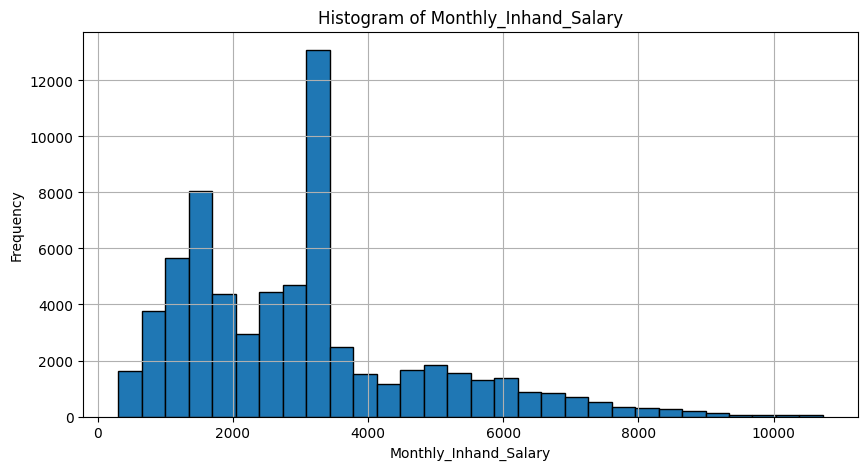

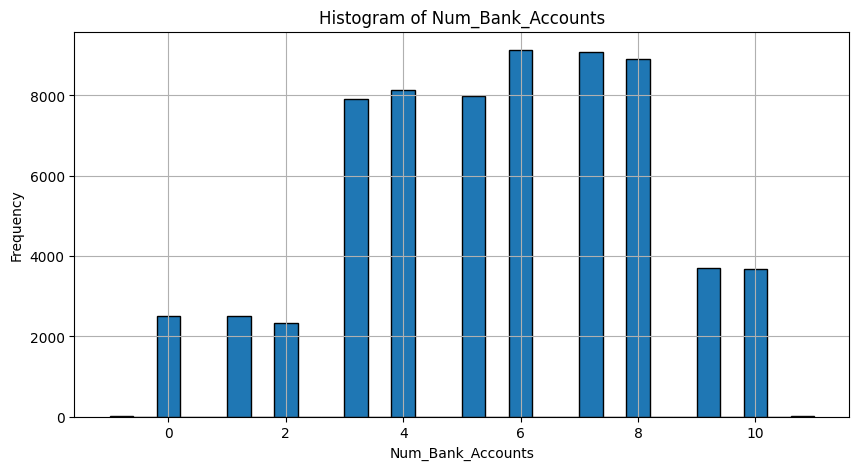

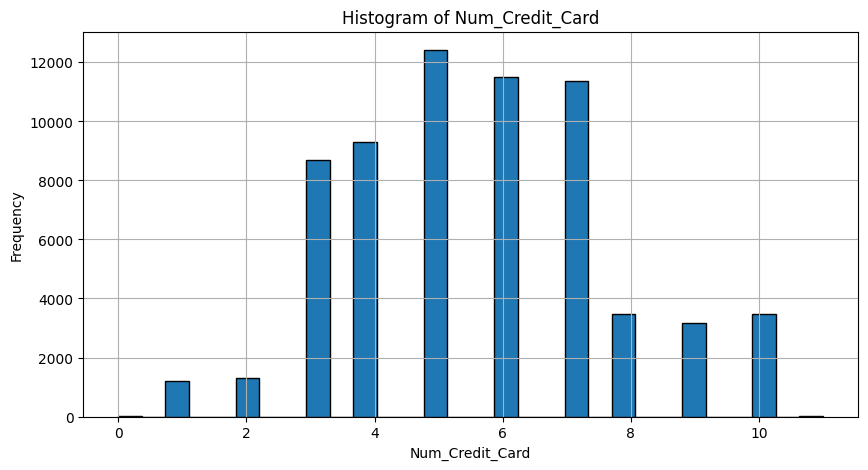

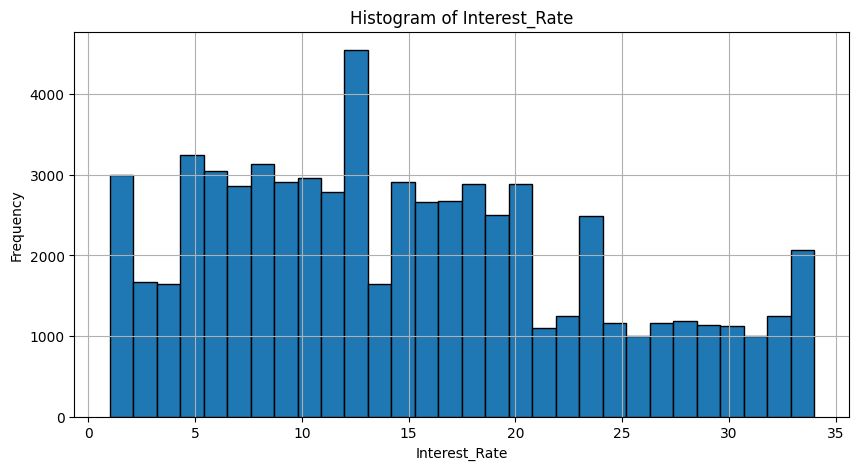

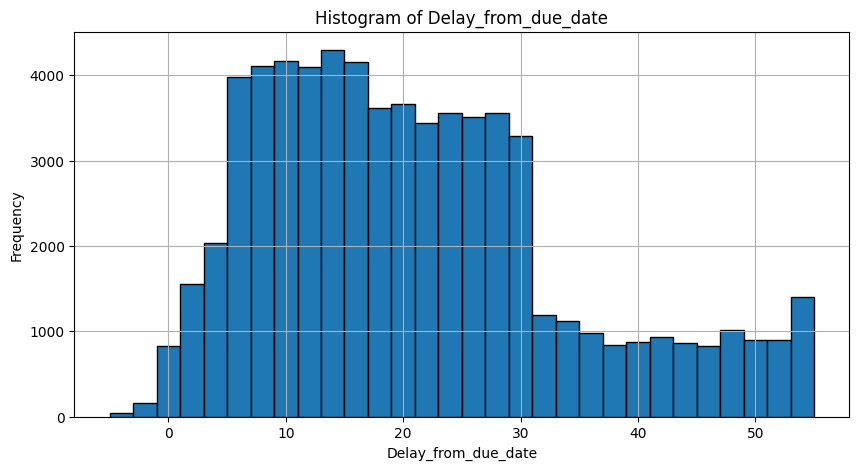

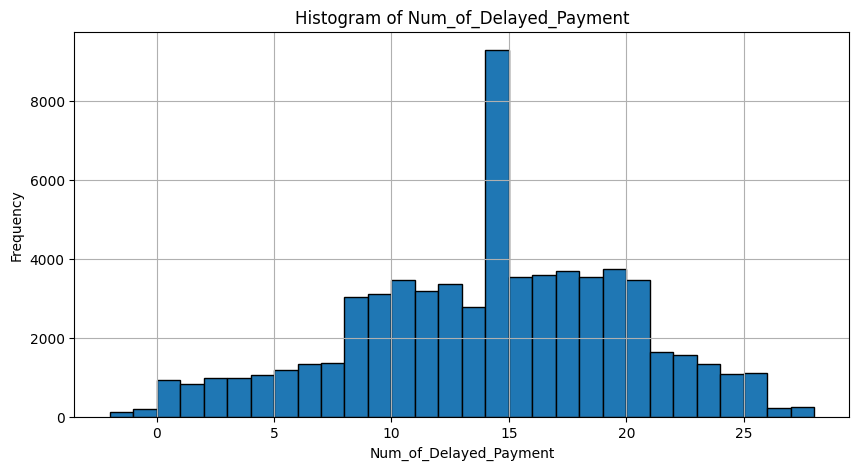

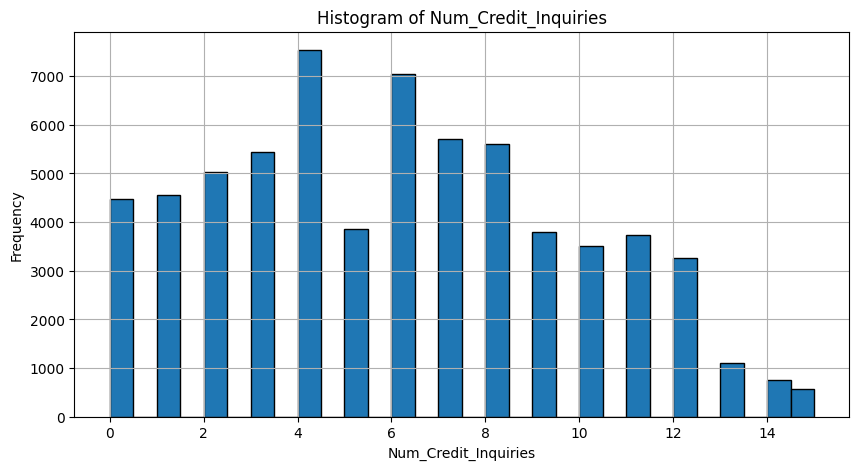

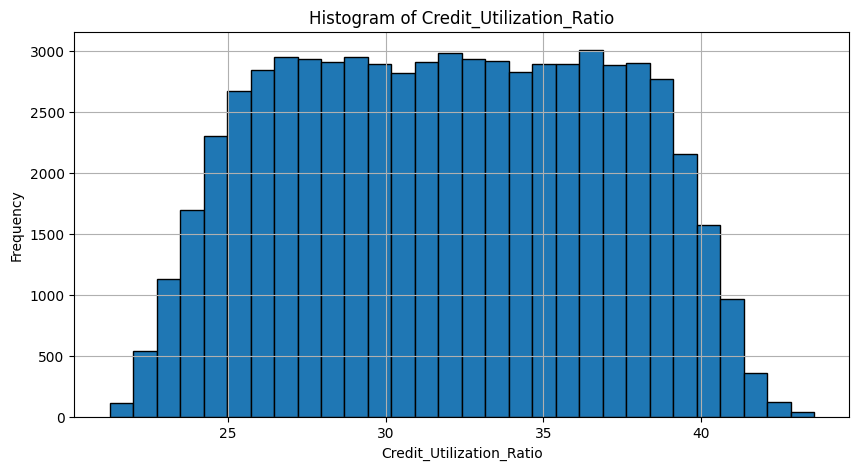

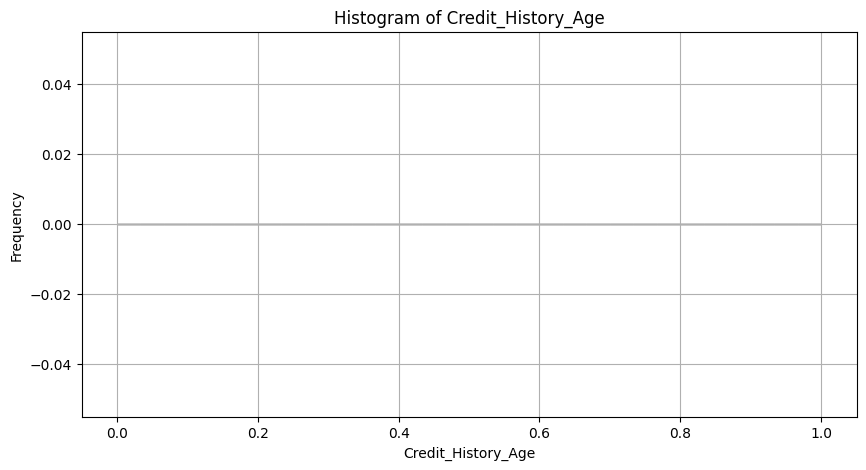

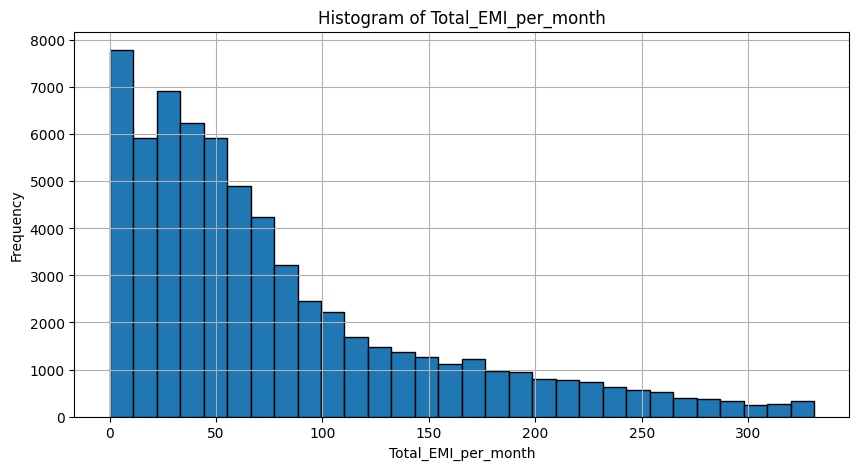

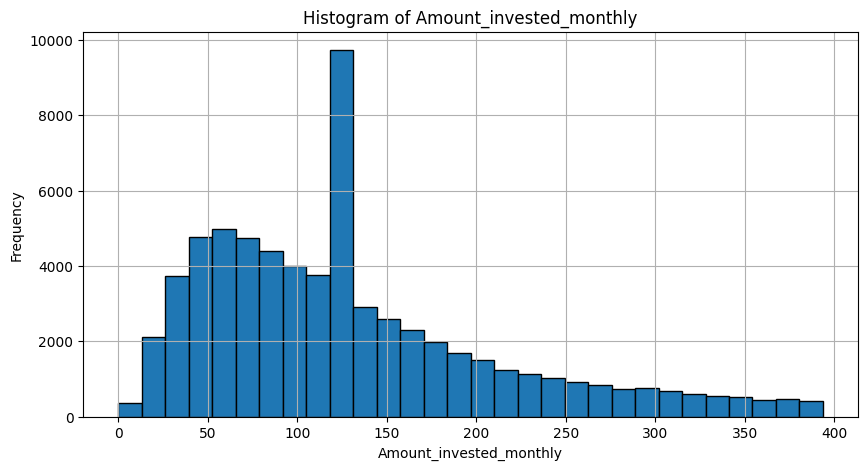

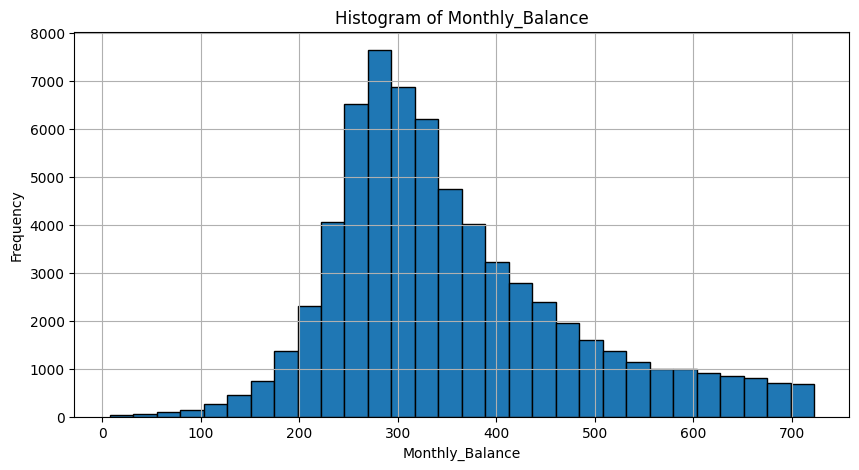

In [22]:
import matplotlib.pyplot as plt

# Plot histograms for all numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    df[column].hist(bins=30, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [24]:
# Convert 'Age' and 'Annual_Income' to numeric, coercing errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')

# Fill missing values with median for these columns
columns_to_fill = ['Age', 'Annual_Income', 'Num_of_Loan', 'Outstanding_Debt']
for column in columns_to_fill:
    if df[column].isnull().sum() > 0:  # Check if there are missing values
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)
        print(f"Filled missing values in '{column}' with median: {median_value}")


Filled missing values in 'Age' with median: 33.0
Filled missing values in 'Annual_Income' with median: 30788.44
Filled missing values in 'Num_of_Loan' with median: 3.0
Filled missing values in 'Outstanding_Debt' with median: 1214.42


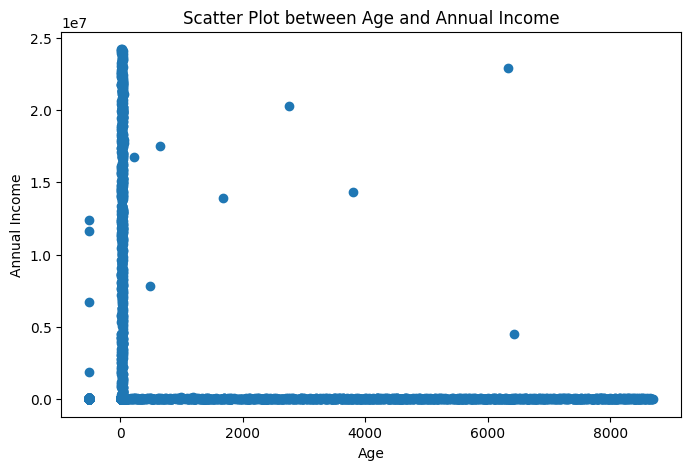

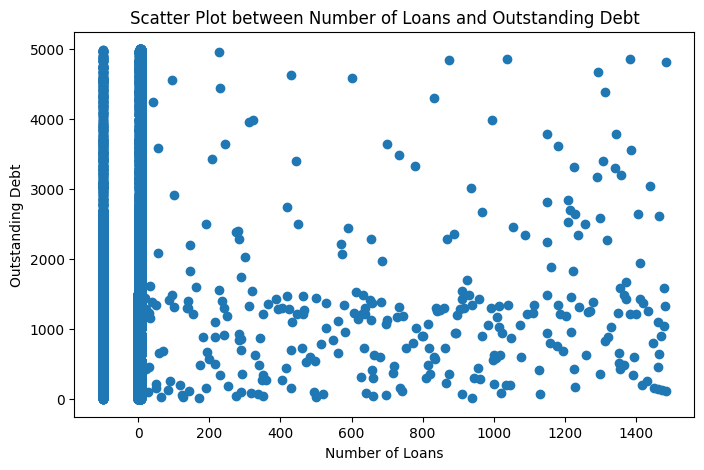

In [25]:
# Scatter plot for visualizing relationships between 'Age' and 'Annual_Income'
plt.figure(figsize=(8, 5))
plt.scatter(df['Age'], df['Annual_Income'])
plt.title('Scatter Plot between Age and Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

# Scatter plot for visualizing relationships between 'Num_of_Loan' and 'Outstanding_Debt'
plt.figure(figsize=(8, 5))
plt.scatter(df['Num_of_Loan'], df['Outstanding_Debt'])
plt.title('Scatter Plot between Number of Loans and Outstanding Debt')
plt.xlabel('Number of Loans')
plt.ylabel('Outstanding Debt')
plt.show()
